In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Background for uncertainties

In [2]:
#If you’re adding or subtracting quantities with uncertainties, you add the absolute uncertainties. 
#If you’re multiplying or dividing, you add the relative uncertainties.
#If you’re multiplying by a constant factor, you multiply absolute uncertainties by the same factor, 
#or do nothing to relative uncertainties. If you’re taking the power of a number with an uncertainty, 
#you multiply the relative uncertainty by the number in the power.


# Residential

Input data

In [3]:
#flood depth in two ways: one as in literature, one almost continuous for the fit 
flood_depth=[0,0.5,1,1.5,2,3,4,5,6]
range_1=np.arange(0,6,0.01)

In [4]:
# normalised damage function for residential from literature
damage_func=[0,0.33,0.49,0.62,0.72,0.87,0.93,0.98,1]

In [5]:
# we make a tuple version so that it is easy to multiply/divide the damage_func with errors
damage_func_double=[[0,0],[0.33,0.33],[0.49,0.49],[0.62,0.62],[0.72,0.72],[0.87,0.87],[0.93,0.93],[0.98,0.98],[1,1]]

In [6]:
#These are the absolute errors for the normalised damage function as given by literature
errors_func=[[0,0],[0.25,0.25],[0.22,0.22],[0.21,0.21],[0.21,0.21],[0.17,0.17],[0.12,0.12],[0.05,0.05],[0.0,0.0]]

In [7]:
#abs_error/values=relative error
errors_func=np.divide(errors_func,damage_func_double)

<ipython-input-7-d3c1ede10bdf>:2: RuntimeWarning: invalid value encountered in true_divide
  errors_func=np.divide(errors_func,damage_func_double)


In [8]:
#make nans 0
errors_func=np.nan_to_num(errors_func)

In [9]:
errors_func

array([[0.        , 0.        ],
       [0.75757576, 0.75757576],
       [0.44897959, 0.44897959],
       [0.33870968, 0.33870968],
       [0.29166667, 0.29166667],
       [0.1954023 , 0.1954023 ],
       [0.12903226, 0.12903226],
       [0.05102041, 0.05102041],
       [0.        , 0.        ]])

Calculate uncertainty of max damage

In [10]:
#given relative errors for construction costs
errors_construction=[0.28,0.53]

In [11]:
#estimated relative error for equation 5
errors_parameters_1=[0.15,0.15]

In [12]:
#estimated relative error for equations 6 and 7
errors_parameters_2=[0.05,0.05]

In [13]:
#add relative uncertainties as in equation 5
errors_max_structure=np.add(errors_construction,errors_parameters_1)

In [14]:
#add relative uncertainties as in equation 6
errors_max_content=np.add(errors_max_structure,errors_parameters_2)

In [15]:
errors_max_content

array([0.48, 0.73])

In [16]:
#transform relative errors into absolute errors, so that they can be added
errors_absolute_structure_formal=errors_max_structure*415
errors_absolute_structure_informal=errors_max_structure*86.5
errors_absolute_structure_villages=errors_max_structure*228.3
errors_absolute_content_formal=errors_max_content*207.5
errors_absolute_content_informal=errors_max_content*43.2
errors_absolute_content_villages=errors_max_content*114.1

In [17]:
errors_absolute_content_formal

array([ 99.6  , 151.475])

In [18]:
errors_absolute_content_informal

array([20.736, 31.536])

In [19]:
errors_absolute_structure_villages

array([ 98.169, 155.244])

In [20]:
#add the content and structure errors, then normalise them over the total to arrive at relative uncertainty for the total, then add the relative uncertainty of equation 7
errors_formal_1=np.add(np.add(errors_absolute_content_formal,errors_absolute_structure_formal)/623,errors_parameters_2)
errors_informal_1=np.add(np.add(errors_absolute_content_informal,errors_absolute_structure_informal)/130,errors_parameters_2)
errors_villages_1=np.add(np.add(errors_absolute_content_villages,errors_absolute_structure_villages)/342,errors_parameters_2)


In [21]:
#errors_formal_1=np.array([0.28,0.53])
#errors_informal_1=np.array([0.28,0.53])
#errors_villages_1=np.array([0.28,0.53])

Create total uncertainties

In [22]:
#add the relative uncertainty of max flood damage with relative errors of normalised damage function
errors_formal_damage=np.add(errors_formal_1,errors_func)
errors_informal_damage=np.add(errors_informal_1,errors_func)
errors_villages_damage=np.add(errors_villages_1,errors_func)

In [23]:
#Now multiply the relative errors with the estiamted values to arrive at absolute uncertainties
# But first, we again make two lists for each category, one for the estimated values, one with tuples for the uncertainties
# 2=formal, 3=informal, 4=villages
damage_func2= [x*124.5 for x in damage_func]
damage_func_2_2=[[x*124.5,x*124.5] for x in damage_func]
damage_func3= [x*77.8 for x in damage_func]
damage_func_3_2=[[x*77.8,x*77.8] for x in damage_func]
damage_func4= [x*68.5 for x in damage_func]
damage_func_4_2=[[x*68.5,x*68.5] for x in damage_func]

In [24]:
#here we multiply the created lists with the errors and transpose for plotting
errors2=np.multiply(damage_func_2_2,errors_formal_damage).T
errors3=np.multiply(damage_func_3_2,errors_informal_damage).T
errors4=np.multiply(damage_func_4_2,errors_villages_damage).T

In [25]:
errors2

array([[  0.        ,  51.51582183,  57.6672809 ,  64.45502889,
         70.63406581,  74.92262119,  72.40504334,  66.7795618 ,
         61.79036918],
       [  0.        ,  61.77882845,  72.90629073,  83.73704133,
         93.02608026, 101.97963864, 101.328062  ,  97.25758146,
         92.89038925]])

In [26]:
#polygon fitting
#a=np.polyfit(np.log(flood_depth), damage_func2, 2)
#b=np.polyfit(np.log(flood_depth), damage_func3, 2)
#c=np.polyfit(np.log(flood_depth), damage_func4, 2)
#y_2=a[0]*np.log(range_1)**2+a[1]*np.log(range_1)+a[2]
#y_3=b[0]*np.log(range_1)**2+b[1]*np.log(range_1)+b[2]
#y_4=c[0]*np.log(range_1)**2+c[1]*np.log(range_1)+c[2]

Powerlaw fitting

In [27]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [28]:
#create the lower and upper bound values, to which the fit should be made
lower_bound1=damage_func2-errors2[0]
upper_bound1=damage_func2+errors2[1]
lower_bound2=damage_func3-errors3[0]
upper_bound2=damage_func3+errors3[1]
lower_bound3=damage_func4-errors4[0]
upper_bound3=damage_func4+errors4[1]

In [29]:
#some l;ower-bounds get below zero, 
#we set them to 0 since gain of money due to flood is unlogical
lower_bound1=[x*(x>=0) for x in lower_bound1]
lower_bound2=[x*(x>=0) for x in lower_bound2]
lower_bound3=[x*(x>=0) for x in lower_bound3]

In [30]:
#fit power-law fits to the estimated values and upper and lower bounds
pars1, cov1 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func2, p0=[0, 0], bounds=(-np.inf, np.inf))
pars1_2, cov1_2 = curve_fit(f=power_law, xdata=flood_depth, ydata=upper_bound1, p0=[0, 0], bounds=(-np.inf, np.inf))
pars1_3, cov1_3 = curve_fit(f=power_law, xdata=flood_depth, ydata=lower_bound1, p0=[0, 0], bounds=(-np.inf, np.inf))
pars2, cov2 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func3, p0=[0, 0], bounds=(-np.inf, np.inf))
pars2_2, cov2_2 = curve_fit(f=power_law, xdata=flood_depth, ydata=upper_bound2, p0=[0, 0], bounds=(-np.inf, np.inf))
pars2_3, cov2_3 = curve_fit(f=power_law, xdata=flood_depth, ydata=lower_bound2, p0=[0, 0], bounds=(-np.inf, np.inf))
pars3, cov3 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func4, p0=[0, 0], bounds=(-np.inf, np.inf))
pars3_2, cov3_2 = curve_fit(f=power_law, xdata=flood_depth, ydata=upper_bound3, p0=[0, 0], bounds=(-np.inf, np.inf))
pars3_3, cov3_3 = curve_fit(f=power_law, xdata=flood_depth, ydata=lower_bound3, p0=[0, 0], bounds=(-np.inf, np.inf))

In [31]:
#create fits
y_1_1=pars1[0]*range_1**pars1[1]
y_1_2=pars1_2[0]*range_1**pars1_2[1]
y_1_3=pars1_3[0]*range_1**pars1_3[1]
y_2_1=pars2[0]*range_1**pars2[1]
y_2_2=pars2_2[0]*range_1**pars2_2[1]
y_2_3=pars2_3[0]*range_1**pars2_3[1]
y_3_1=pars3[0]*range_1**pars3[1]
y_3_2=pars3_2[0]*range_1**pars3_2[1]
y_3_3=pars3_3[0]*range_1**pars3_3[1]

plotting

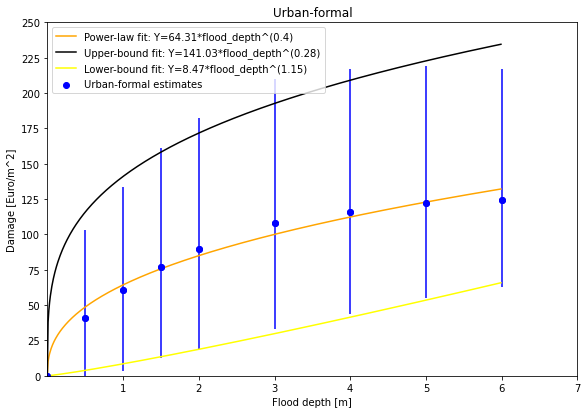

In [33]:
# plot the urban formal estimates of flood damage as a function of flood depth
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func2,color="blue")
plt.errorbar(flood_depth,damage_func2,yerr=errors2, fmt="o",color="blue")
plt.plot(range_1, y_1_1,color="orange")
plt.plot(range_1, y_1_2,color="black")
plt.plot(range_1, y_1_3,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 1), yticks=np.arange(0, max(damage_func2)+140,25))
ax.legend(['Power-law fit: Y=' + str(round(pars1[0],2))+'*flood_depth^('+str(round(pars1[1],2))+')','Upper-bound fit: Y=' + str(round(pars1_2[0],2))+'*flood_depth^('+str(round(pars1_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars1_3[0],2))+'*flood_depth^('+str(round(pars1_3[1],2))+')', 'Urban-formal estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Urban-formal")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_1_2.png', dpi=100)
plt.show()

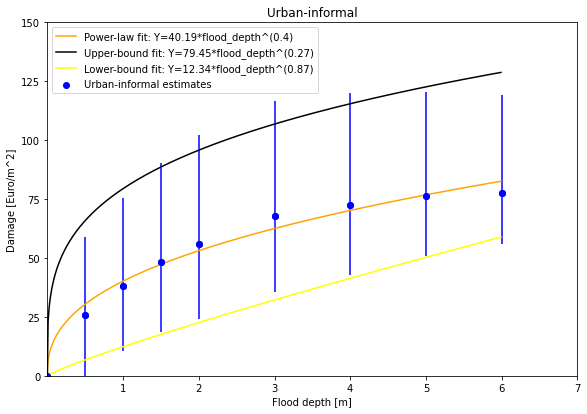

In [42]:
# plot the urban informal estimates of flood damage as a function of flood depth
fig, ax = plt.subplots()

plt.scatter(flood_depth,damage_func3,color="blue")

plt.errorbar(flood_depth,damage_func3,yerr=errors3, fmt="o", color="blue")
plt.plot(range_1, y_2_1, color="orange")
plt.plot(range_1, y_2_2, color="black")
plt.plot(range_1, y_2_3, color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 1), yticks=np.arange(0, max(damage_func2)+40,25))
ax.legend(['Power-law fit: Y=' + str(round(pars2[0],2))+'*flood_depth^('+str(round(pars2[1],2))+')','Upper-bound fit: Y=' + str(round(pars2_2[0],2))+'*flood_depth^('+str(round(pars2_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars2_3[0],2))+'*flood_depth^('+str(round(pars2_3[1],2))+')', 'Urban-informal estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Urban-informal")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_2_2.png', dpi=100)
plt.show()

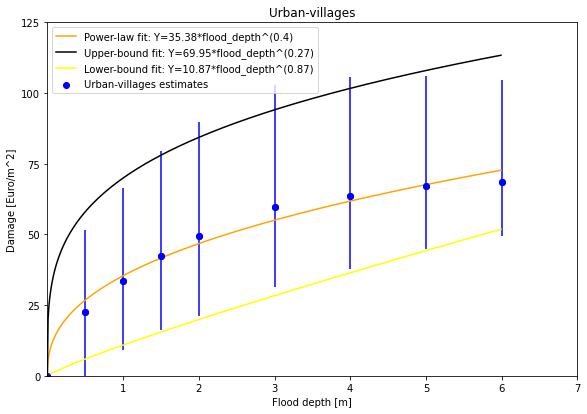

In [44]:
# plot the urban villages estimates of flood damage as a function of flood depth
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func4,color="blue")
plt.errorbar(flood_depth,damage_func4,yerr=errors4, fmt="o", color="blue")
plt.plot(range_1, y_3_1,color="orange")
plt.plot(range_1, y_3_2,color="black")
plt.plot(range_1, y_3_3,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 1), yticks=np.arange(0, max(damage_func2)+15,25))
ax.legend(['Power-law fit: Y=' + str(round(pars3[0],2))+'*flood_depth^('+str(round(pars3[1],2))+')','Upper-bound fit: Y=' + str(round(pars3_2[0],2))+'*flood_depth^('+str(round(pars3_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars3_3[0],2))+'*flood_depth^('+str(round(pars3_3[1],2))+')', 'Urban-villages estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Urban-villages")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_3_2.png', dpi=100)
plt.show()

calculate R^2

In [45]:

from sklearn.metrics import r2_score
r_1_1=pars1[0]*flood_depth**pars1[1]
r_1_2=pars1_2[0]*flood_depth**pars1_2[1]
r_1_3=pars1_3[0]*flood_depth**pars1_3[1]
r_2_1=pars2[0]*flood_depth**pars2[1]
r_2_2=pars2_2[0]*flood_depth**pars2_2[1]
r_2_3=pars2_3[0]*flood_depth**pars2_3[1]
r_3_1=pars3[0]*flood_depth**pars3[1]
r_3_2=pars3_2[0]*flood_depth**pars3_2[1]
r_3_3=pars3_3[0]*flood_depth**pars3_3[1]

In [46]:
coefficient_of_dermination_1_1 = r2_score(damage_func2, r_1_1)
coefficient_of_dermination_1_2 = r2_score(upper_bound1, r_1_2)
coefficient_of_dermination_1_3 = r2_score(lower_bound1, r_1_3)
coefficient_of_dermination_2_1 = r2_score(damage_func3, r_2_1)
coefficient_of_dermination_2_2 = r2_score(upper_bound2, r_2_2)
coefficient_of_dermination_2_3 = r2_score(lower_bound2, r_2_3)
coefficient_of_dermination_3_1 = r2_score(damage_func4, r_3_1)
coefficient_of_dermination_3_2 = r2_score(upper_bound3, r_3_2)
coefficient_of_dermination_3_3 = r2_score(lower_bound3, r_3_3)

In [47]:
print(coefficient_of_dermination_1_1)
print(coefficient_of_dermination_1_2)
print(coefficient_of_dermination_1_3)
print(coefficient_of_dermination_2_1)
print(coefficient_of_dermination_2_2)
print(coefficient_of_dermination_2_3)
print(coefficient_of_dermination_3_1)
print(coefficient_of_dermination_3_2)
print(coefficient_of_dermination_3_3)

0.9835575158199844
0.9743808916611149
0.9791602740124994
0.9835575158199836
0.9743808916611142
0.9791602740127637
0.9835575158197362
0.9743808916611149
0.9791602740085826


# industry

Follows same structure as residential classes

In [48]:
flood_depth=[0,0.5,1,1.5,2,3,4,5,6]
range_1=np.arange(0,6,0.01)

In [49]:
damage_func=[0,0.28,0.48,0.63,0.72,0.86,0.91,0.96,1]

In [50]:
damage_func_double=[[0,0],[0.28,0.28],[0.48,0.48],[0.63,0.63],[0.72,0.72],[0.86,0.86],[0.91,0.91],[0.96,0.96],[1,1]]

In [51]:
errors_func=[[0,0],[0.24,0.24],[0.24,0.24],[0.24,0.24],[0.25,0.25],[0.17,0.17],[0.11,0.11],[0.05,0.05],[0.0,0.0]]

In [52]:
#abs_error/values=relative error
errors_func=np.divide(errors_func,damage_func_double)

<ipython-input-52-d3c1ede10bdf>:2: RuntimeWarning: invalid value encountered in true_divide
  errors_func=np.divide(errors_func,damage_func_double)


In [53]:
#make nans 0
errors_func=np.nan_to_num(errors_func)

In [54]:
errors_func

array([[0.        , 0.        ],
       [0.85714286, 0.85714286],
       [0.5       , 0.5       ],
       [0.38095238, 0.38095238],
       [0.34722222, 0.34722222],
       [0.19767442, 0.19767442],
       [0.12087912, 0.12087912],
       [0.05208333, 0.05208333],
       [0.        , 0.        ]])

In [55]:
errors_construction=[0.3,0.53]

In [56]:
errors_parameters_1=[0.3,0.3]

In [57]:
errors_parameters_2=[0.1,0.1]

In [58]:
errors_max_structure=np.add(errors_construction,errors_parameters_1)

In [59]:
errors_max_content=np.add(errors_max_structure,errors_parameters_2)

In [60]:
errors_max_structure*290

array([174. , 240.7])

In [61]:
errors_max_content*434.9

array([304.43 , 404.457])

In [62]:
errors_absolute_structure_industry=errors_max_structure*290.0
errors_absolute_content_industry=errors_max_content*434.9


In [63]:
errors_indus_1=np.add(np.add(errors_absolute_content_industry,errors_absolute_structure_industry)/725,errors_parameters_2)
errors_indus_damage=np.add(errors_indus_1,errors_func)


In [367]:
np.add(errors_absolute_content_industry,errors_absolute_structure_industry)

array([478.43 , 645.157])

In [368]:
damage_func2= [x*217.5 for x in damage_func]
damage_func_2_2=[[x*217.5,x*217.5] for x in damage_func]

In [369]:
errors2=np.multiply(damage_func_2_2,errors_indus_damage).T

In [370]:
errors2

array([[  0.      ,  98.47812 , 131.53392 , 156.32577 , 173.37588 ,
        179.11494 , 174.32889 , 169.54284 , 165.279   ],
       [  0.      , 112.483188, 155.542608, 187.837173, 209.388912,
        222.130506, 219.845361, 217.560216, 215.2971  ]])

Powerlaw fitting

In [371]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [372]:
pars1, cov1 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func2, p0=[0, 0], bounds=(-np.inf, np.inf))

In [373]:
lower_bound=damage_func2-errors2[0]
upper_bound=damage_func2+errors2[1]

In [376]:
lower_bound=[x*(x>=0) for x in lower_bound]

In [377]:
pars1_2, cov1_2 = curve_fit(f=power_law, xdata=flood_depth, ydata=upper_bound, p0=[0, 0], bounds=(-np.inf, np.inf))
pars1_3, cov1_3 = curve_fit(f=power_law, xdata=flood_depth, ydata=lower_bound, p0=[0, 0], bounds=(-np.inf, np.inf))

In [378]:
y_1_1=pars1[0]*range_1**pars1[1]
y_1_2=pars1_2[0]*range_1**pars1_2[1]
y_1_3=pars1_3[0]*range_1**pars1_3[1]

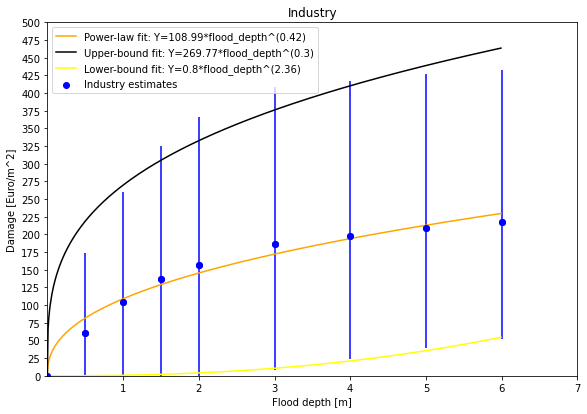

In [379]:
# plot
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func2, color="blue")
plt.errorbar(flood_depth,damage_func2,yerr=errors2, fmt="o", color="blue")
plt.plot(range_1, y_1_1,color="orange")
plt.plot(range_1, y_1_2,color="black")
plt.plot(range_1, y_1_3,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 1), yticks=np.arange(0, max(damage_func2)+290,25))
ax.legend(['Power-law fit: Y=' + str(round(pars1[0],2))+'*flood_depth^('+str(round(pars1[1],2))+')','Upper-bound fit: Y=' + str(round(pars1_2[0],2))+'*flood_depth^('+str(round(pars1_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars1_3[0],2))+'*flood_depth^('+str(round(pars1_3[1],2))+')', 'Industry estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Industry")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_4_2.png', dpi=100)
plt.show()

In [380]:
r_1_1=pars1[0]*flood_depth**pars1[1]
r_1_2=pars1_2[0]*flood_depth**pars1_2[1]
r_1_3=pars1_3[0]*flood_depth**pars1_3[1]

In [381]:
coefficient_of_dermination_1_1 = r2_score(damage_func2, r_1_1)
coefficient_of_dermination_1_2 = r2_score(upper_bound, r_1_2)
coefficient_of_dermination_1_3 = r2_score(lower_bound, r_1_3)

In [382]:
print(coefficient_of_dermination_1_1)
print(coefficient_of_dermination_1_2)
print(coefficient_of_dermination_1_3)

0.9760941273247038
0.9652501842687821
0.982684887667083


# Agriculture

In [61]:
flood_depth=[0,0.5,1,1.5,2,3,4,5,6]
range_1=np.arange(0,6,0.01)

In [62]:
damage_func=[0,0.14,0.37,0.52,0.56,0.66,0.83,0.99,1]

In [63]:
damage_func_double=[[0,0],[0.14,0.14],[0.37,0.37],[0.52,0.52],[0.56,0.56],[0.66,0.66],[0.83,0.83],[0.99,0.99],[1,1]]

In [64]:
#absolute errors for normalised function and value added per hectare
errors_func=[[0,0],[0.19,0.19],[0.35,0.35],[0.48,0.48],[0.46,0.46],[0.36,0.36],[0.16,0.16],[0.03,0.03],[0.0,0.0]]
errors_parameters_2=[[0.1,0.1]]*9

In [65]:
#abs_error/values=relative error
errors_func=np.divide(errors_func,damage_func_double)

<ipython-input-65-d3c1ede10bdf>:2: RuntimeWarning: invalid value encountered in true_divide
  errors_func=np.divide(errors_func,damage_func_double)


In [66]:
#make nans 0
errors_func=np.nan_to_num(errors_func)

In [67]:
errors_func

array([[0.        , 0.        ],
       [1.35714286, 1.35714286],
       [0.94594595, 0.94594595],
       [0.92307692, 0.92307692],
       [0.82142857, 0.82142857],
       [0.54545455, 0.54545455],
       [0.19277108, 0.19277108],
       [0.03030303, 0.03030303],
       [0.        , 0.        ]])

In [68]:
#add relative errors of max damage and normalised function
errors=np.add(errors_func,errors_parameters_2)

In [69]:
errors

array([[0.1       , 0.1       ],
       [1.45714286, 1.45714286],
       [1.04594595, 1.04594595],
       [1.02307692, 1.02307692],
       [0.92142857, 0.92142857],
       [0.64545455, 0.64545455],
       [0.29277108, 0.29277108],
       [0.13030303, 0.13030303],
       [0.1       , 0.1       ]])

In [70]:
#estimate values
damage_func2= [x*(1147/10000) for x in damage_func]
damage_func_2_2=[[x*(1147/10000),x*(1147/10000)] for x in damage_func]

In [71]:
#make absolute errors
errors2=np.multiply(damage_func_2_2,errors).T

In [72]:
errors2

array([[0.       , 0.0233988, 0.0443889, 0.0610204, 0.0591852, 0.0488622,
        0.0278721, 0.0147963, 0.01147  ],
       [0.       , 0.0233988, 0.0443889, 0.0610204, 0.0591852, 0.0488622,
        0.0278721, 0.0147963, 0.01147  ]])

In [73]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [74]:
pars1, cov1 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func2, p0=[0, 0], bounds=(-np.inf, np.inf))

In [75]:
lower_bound=damage_func2-errors2[0]
upper_bound=damage_func2+errors2[1]

In [76]:
lower_bound=[x*(x>=0) for x in lower_bound]

In [77]:
pars1_2, cov1_2 = curve_fit(f=power_law, xdata=flood_depth, ydata=upper_bound, p0=[0, 0], bounds=(-np.inf, np.inf))
pars1_3, cov1_3 = curve_fit(f=power_law, xdata=flood_depth, ydata=lower_bound, p0=[0, 0], bounds=(-np.inf, np.inf))

In [78]:
y_1_1=pars1[0]*range_1**pars1[1]
y_1_2=pars1_2[0]*range_1**pars1_2[1]
y_1_3=pars1_3[0]*range_1**pars1_3[1]

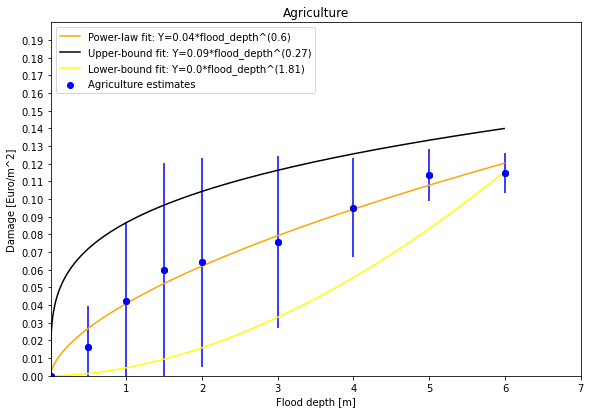

In [79]:
# plot
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func2, color="blue")
plt.errorbar(flood_depth,damage_func2,yerr=errors2, fmt="o", color="blue")
plt.plot(range_1, y_1_1,color="orange")
plt.plot(range_1, y_1_2,color="black")
plt.plot(range_1, y_1_3,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 0.2), yticks=np.arange(0, 0.2,0.01))
ax.legend(['Power-law fit: Y=' + str(round(pars1[0],2))+'*flood_depth^('+str(round(pars1[1],2))+')','Upper-bound fit: Y=' + str(round(pars1_2[0],2))+'*flood_depth^('+str(round(pars1_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars1_3[0],2))+'*flood_depth^('+str(round(pars1_3[1],2))+')', 'Agriculture estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Agriculture")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_5_2.png', dpi=100)
plt.show()

polynomial

In [93]:
flood_depth=[0.001,0.5,1,1.5,2,3,4,5,6]

In [94]:
normal_fit=np.polyfit(np.log(flood_depth), damage_func2, 2)
lower_fit=np.polyfit(np.log(flood_depth), lower_bound, 2)
upper_fit=np.polyfit(np.log(flood_depth), upper_bound, 2)

In [95]:
normal=normal_fit[0]*np.log(range_1)**2+normal_fit[1]*np.log(range_1)+normal_fit[2]
lower=lower_fit[0]*np.log(range_1)**2+lower_fit[1]*np.log(range_1)+lower_fit[2]
upper=upper_fit[0]*np.log(range_1)**2+upper_fit[1]*np.log(range_1)+upper_fit[2]

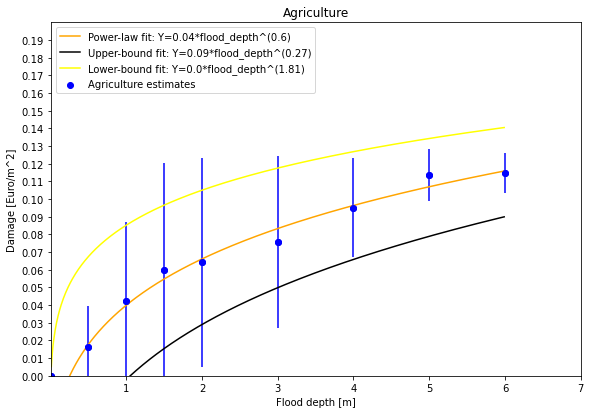

In [97]:
# plot
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func2, color="blue")
plt.errorbar(flood_depth,damage_func2,yerr=errors2, fmt="o", color="blue")
plt.plot(range_1, normal,color="orange")
plt.plot(range_1, lower, color="black")
plt.plot(range_1, upper,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 0.2), yticks=np.arange(0, 0.2,0.01))
ax.legend(['Power-law fit: Y=' + str(round(pars1[0],2))+'*flood_depth^('+str(round(pars1[1],2))+')','Upper-bound fit: Y=' + str(round(pars1_2[0],2))+'*flood_depth^('+str(round(pars1_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars1_3[0],2))+'*flood_depth^('+str(round(pars1_3[1],2))+')', 'Agriculture estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Agriculture")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_5_2.png', dpi=100)
plt.show()

In [89]:
normal=normal_fit[0]*np.log(flood_depth)**2+normal_fit[1]*np.log(flood_depth)+normal_fit[2]
lower=lower_fit[0]*np.log(flood_depth)**2+lower_fit[1]*np.log(flood_depth)+lower_fit[2]
upper=upper_fit[0]*np.log(flood_depth)**2+upper_fit[1]*np.log(flood_depth)+upper_fit[2]

In [90]:
coefficient_of_dermination_1_1 = r2_score(damage_func2, normal)
coefficient_of_dermination_1_2 = r2_score(upper_bound, upper)
coefficient_of_dermination_1_3 = r2_score(lower_bound, lower)

In [91]:
print(coefficient_of_dermination_1_1)
print(coefficient_of_dermination_1_2)
print(coefficient_of_dermination_1_3)

0.9891581769349045
0.8839840677635491
0.8288867814977936


In [482]:
r_1_1=pars1[0]*flood_depth**pars1[1]
r_1_2=pars1_2[0]*flood_depth**pars1_2[1]
r_1_3=pars1_3[0]*flood_depth**pars1_3[1]

In [483]:
coefficient_of_dermination_1_1 = r2_score(damage_func2, r_1_1)
coefficient_of_dermination_1_2 = r2_score(upper_bound, r_1_2)
coefficient_of_dermination_1_3 = r2_score(lower_bound, r_1_3)

In [484]:
print(coefficient_of_dermination_1_1)
print(coefficient_of_dermination_1_2)
print(coefficient_of_dermination_1_3)

0.9801111479487464
0.8678976036262455
0.9486102453263364


## Transport

In [2]:
flood_depth=[0,0.5,1,1.5,2,3,4,5,6]
range_1=np.arange(0,6,0.01)

In [3]:
damage_func=[0,0.36,0.57,0.73,0.85,1.00,1.00,1.00,1.00]

In [4]:
damage_func_double=[[0,0],[0.36,0.36],[0.57,0.57],[0.73,0.73],[0.85,0.85],[1.00,1.00],[1.00,1.00],[1.00,1.00],[1.00,1.00]]

In [5]:
#absolute errors for normalised function and value added per hectare
errors_func=[[0,0],[0.3,0.3],[0.28,0.28],[0.25,0.25],[0.17,0.17],[0.00,0.0],[0.0,0.0],[0.00,0.00],[0.0,0.0]]
errors_parameters_2=[[0.1,0.1]]*9

In [6]:
209*3585.40/2834

264.4137614678899

In [7]:
#abs_error/values=relative error
errors_func=np.divide(errors_func,damage_func_double)

<ipython-input-7-d3c1ede10bdf>:2: RuntimeWarning: invalid value encountered in true_divide
  errors_func=np.divide(errors_func,damage_func_double)


In [8]:
#make nans 0
errors_func=np.nan_to_num(errors_func)

In [9]:
errors_func

array([[0.        , 0.        ],
       [0.83333333, 0.83333333],
       [0.49122807, 0.49122807],
       [0.34246575, 0.34246575],
       [0.2       , 0.2       ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [10]:
#add relative errors of max damage and normalised function
errors=np.add(errors_func,errors_parameters_2)

In [11]:
errors

array([[0.1       , 0.1       ],
       [0.93333333, 0.93333333],
       [0.59122807, 0.59122807],
       [0.44246575, 0.44246575],
       [0.3       , 0.3       ],
       [0.1       , 0.1       ],
       [0.1       , 0.1       ],
       [0.1       , 0.1       ],
       [0.1       , 0.1       ]])

In [12]:
#estimate values
damage_func2= [x*(264.4137614678899) for x in damage_func]
damage_func_2_2=[[x*(264.4137614678899),x*(264.4137614678899)] for x in damage_func]

In [13]:
damage_func2

[0.0,
 95.18895412844037,
 150.71584403669723,
 193.02204587155964,
 224.75169724770643,
 264.4137614678899,
 264.4137614678899,
 264.4137614678899,
 264.4137614678899]

In [14]:
#make absolute errors
errors2=np.multiply(damage_func_2_2,errors).T

In [15]:
errors2

array([[ 0.        , 88.84302385, 89.10743761, 85.40564495, 67.42550917,
        26.44137615, 26.44137615, 26.44137615, 26.44137615],
       [ 0.        , 88.84302385, 89.10743761, 85.40564495, 67.42550917,
        26.44137615, 26.44137615, 26.44137615, 26.44137615]])

In [16]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [17]:
pars1, cov1 = curve_fit(f=power_law, xdata=flood_depth, ydata=damage_func2, p0=[0, 0], bounds=(-np.inf, np.inf))

In [18]:
lower_bound=damage_func2-errors2[0]
upper_bound=damage_func2+errors2[1]

In [19]:
lower_bound=[x*(x>=0) for x in lower_bound]

In [20]:
pars1_2, cov1_2 = curve_fit(f=power_law, xdata=flood_depth, ydata=upper_bound, p0=[0, 0], bounds=(-np.inf, np.inf))
pars1_3, cov1_3 = curve_fit(f=power_law, xdata=flood_depth, ydata=lower_bound, p0=[0, 0], bounds=(-np.inf, np.inf))

In [21]:
y_1_1=pars1[0]*range_1**pars1[1]
y_1_2=pars1_2[0]*range_1**pars1_2[1]
y_1_3=pars1_3[0]*range_1**pars1_3[1]

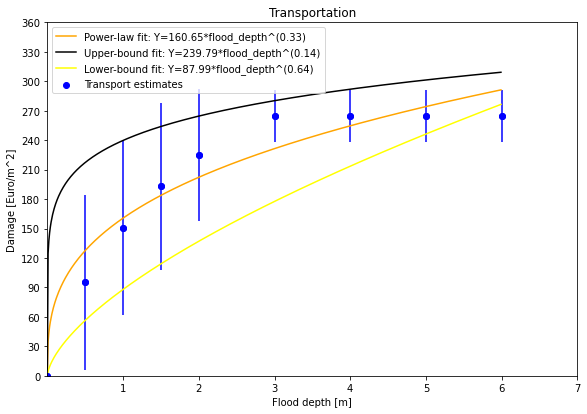

In [23]:
# plot
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func2, color="blue")
plt.errorbar(flood_depth,damage_func2,yerr=errors2, fmt="o", color="blue")
plt.plot(range_1, y_1_1,color="orange")
plt.plot(range_1, y_1_2,color="black")
plt.plot(range_1, y_1_3,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 270), yticks=np.arange(0, 380,30))
ax.legend(['Power-law fit: Y=' + str(round(pars1[0],2))+'*flood_depth^('+str(round(pars1[1],2))+')','Upper-bound fit: Y=' + str(round(pars1_2[0],2))+'*flood_depth^('+str(round(pars1_2[1],2))+')',
           'Lower-bound fit: Y=' + str(round(pars1_3[0],2))+'*flood_depth^('+str(round(pars1_3[1],2))+')', 'Transport estimates'],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Transportation")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

In [77]:
r_1_1=pars1[0]*flood_depth**pars1[1]
r_1_2=pars1_2[0]*flood_depth**pars1_2[1]
r_1_3=pars1_3[0]*flood_depth**pars1_3[1]

In [79]:

from sklearn.metrics import r2_score

In [80]:
coefficient_of_dermination_1_1 = r2_score(damage_func2, r_1_1)
coefficient_of_dermination_1_2 = r2_score(upper_bound, r_1_2)
coefficient_of_dermination_1_3 = r2_score(lower_bound, r_1_3)

In [81]:
print(coefficient_of_dermination_1_1)
print(coefficient_of_dermination_1_2)
print(coefficient_of_dermination_1_3)

0.9464669139661276
0.9597807389056846
0.8862953009298973


In [123]:
flood_depth=[0.000001,0.5,1,1.5,2,3,4,5,6]
range_1=np.arange(0,6,0.01)

In [124]:
damage_func=[0,0.36,0.57,0.73,0.85,1.00,1.00,1.00,1.00]

In [125]:
damage_func_double=[[0,0],[0.36,0.36],[0.57,0.57],[0.73,0.73],[0.85,0.85],[1.00,1.00],[1.00,1.00],[1.00,1.00],[1.00,1.00]]

In [126]:
#absolute errors for normalised function and value added per hectare
errors_func=[[0,0],[0.3,0.3],[0.28,0.28],[0.25,0.25],[0.17,0.17],[0.00,0.0],[0.0,0.0],[0.00,0.00],[0.0,0.0]]
errors_parameters_2=[[0.1,0.1]]*9

In [127]:
209*3585.40/2834

264.4137614678899

In [128]:
#abs_error/values=relative error
errors_func=np.divide(errors_func,damage_func_double)

<ipython-input-128-d3c1ede10bdf>:2: RuntimeWarning: invalid value encountered in true_divide
  errors_func=np.divide(errors_func,damage_func_double)


In [129]:
#make nans 0
errors_func=np.nan_to_num(errors_func)

In [130]:
errors_func

array([[0.        , 0.        ],
       [0.83333333, 0.83333333],
       [0.49122807, 0.49122807],
       [0.34246575, 0.34246575],
       [0.2       , 0.2       ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [131]:
#add relative errors of max damage and normalised function
errors=np.add(errors_func,errors_parameters_2)

In [132]:
errors

array([[0.1       , 0.1       ],
       [0.93333333, 0.93333333],
       [0.59122807, 0.59122807],
       [0.44246575, 0.44246575],
       [0.3       , 0.3       ],
       [0.1       , 0.1       ],
       [0.1       , 0.1       ],
       [0.1       , 0.1       ],
       [0.1       , 0.1       ]])

In [133]:
#estimate values
damage_func2= [x*(264.4137614678899) for x in damage_func]
damage_func_2_2=[[x*(264.4137614678899),x*(264.4137614678899)] for x in damage_func]

In [134]:
damage_func2

[0.0,
 95.18895412844037,
 150.71584403669723,
 193.02204587155964,
 224.75169724770643,
 264.4137614678899,
 264.4137614678899,
 264.4137614678899,
 264.4137614678899]

In [135]:
#make absolute errors
errors2=np.multiply(damage_func_2_2,errors).T

In [136]:
errors2

array([[ 0.        , 88.84302385, 89.10743761, 85.40564495, 67.42550917,
        26.44137615, 26.44137615, 26.44137615, 26.44137615],
       [ 0.        , 88.84302385, 89.10743761, 85.40564495, 67.42550917,
        26.44137615, 26.44137615, 26.44137615, 26.44137615]])

In [137]:
lower_bound=damage_func2-errors2[0]
upper_bound=damage_func2+errors2[1]

In [138]:
normal_fit=np.polyfit(np.log(flood_depth), damage_func2, 2)
lower_fit=np.polyfit(np.log(flood_depth), lower_bound, 2)
upper_fit=np.polyfit(np.log(flood_depth), upper_bound, 2)

In [139]:
normal=normal_fit[0]*np.log(range_1)**2+normal_fit[1]*np.log(range_1)+normal_fit[2]
lower=lower_fit[0]*np.log(range_1)**2+lower_fit[1]*np.log(range_1)+lower_fit[2]
upper=upper_fit[0]*np.log(range_1)**2+upper_fit[1]*np.log(range_1)+upper_fit[2]

<ipython-input-139-b57567eb3a84>:1: RuntimeWarning: divide by zero encountered in log
  normal=normal_fit[0]*np.log(range_1)**2+normal_fit[1]*np.log(range_1)+normal_fit[2]
<ipython-input-139-b57567eb3a84>:1: RuntimeWarning: invalid value encountered in add
  normal=normal_fit[0]*np.log(range_1)**2+normal_fit[1]*np.log(range_1)+normal_fit[2]
<ipython-input-139-b57567eb3a84>:2: RuntimeWarning: divide by zero encountered in log
  lower=lower_fit[0]*np.log(range_1)**2+lower_fit[1]*np.log(range_1)+lower_fit[2]
<ipython-input-139-b57567eb3a84>:2: RuntimeWarning: invalid value encountered in add
  lower=lower_fit[0]*np.log(range_1)**2+lower_fit[1]*np.log(range_1)+lower_fit[2]
<ipython-input-139-b57567eb3a84>:3: RuntimeWarning: divide by zero encountered in log
  upper=upper_fit[0]*np.log(range_1)**2+upper_fit[1]*np.log(range_1)+upper_fit[2]
<ipython-input-139-b57567eb3a84>:3: RuntimeWarning: invalid value encountered in add
  upper=upper_fit[0]*np.log(range_1)**2+upper_fit[1]*np.log(range_1)+

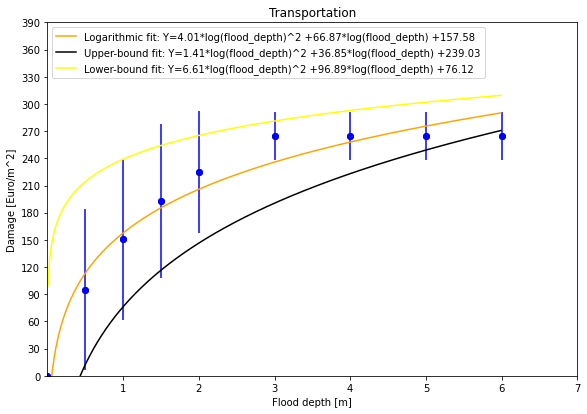

In [147]:
# plot
fig, ax = plt.subplots()
plt.scatter(flood_depth,damage_func2, color="blue")
plt.errorbar(flood_depth,damage_func2,yerr=errors2, fmt="o", color="blue")
plt.plot(range_1, normal,color="orange")
plt.plot(range_1, lower, color="black")
plt.plot(range_1, upper,color="yellow")
#ax.plot(flood_depth, damage_func2, linewidth=2.0)
#ax.plot(flood_depth, damage_func3, linewidth=2.0)
#ax.plot(flood_depth, damage_func4, linewidth=2.0)
ax.set(xlim=(0, 6), xticks=np.arange(1, 8),
       ylim=(0, 300), yticks=np.arange(0, 400,30))
ax.legend(['Logarithmic fit: Y=' + str(round(normal_fit[0],2))+'*log(flood_depth)^2 +'+str(round(normal_fit[1],2))+'*log(flood_depth) +' + str(round(normal_fit[2],2)),
           'Upper-bound fit: Y=' + str(round(upper_fit[0],2))+'*log(flood_depth)^2 +'+str(round(upper_fit[1],2))+'*log(flood_depth) +' + str(round(upper_fit[2],2)),
           'Lower-bound fit: Y=' + str(round(lower_fit[0],2))+'*log(flood_depth)^2 +'+str(round(lower_fit[1],2))+'*log(flood_depth) +' + str(round(lower_fit[2],2))],loc=2)
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage [Euro/m^2]")
plt.title("Transportation")
fig.set_size_inches(9.5, 6.5)
fig.savefig('damage_curve_trans.png', dpi=100)
plt.show()

In [116]:
normal=normal_fit[0]*np.log(flood_depth)**2+normal_fit[1]*np.log(flood_depth)+normal_fit[2]
lower=lower_fit[0]*np.log(flood_depth)**2+lower_fit[1]*np.log(flood_depth)+lower_fit[2]
upper=upper_fit[0]*np.log(flood_depth)**2+upper_fit[1]*np.log(flood_depth)+upper_fit[2]

In [117]:

from sklearn.metrics import r2_score

In [118]:
coefficient_of_dermination_1_1 = r2_score(damage_func2, normal)
coefficient_of_dermination_1_2 = r2_score(upper_bound, upper)
coefficient_of_dermination_1_3 = r2_score(lower_bound, lower)

In [119]:
print(coefficient_of_dermination_1_1)
print(coefficient_of_dermination_1_2)
print(coefficient_of_dermination_1_3)

0.965208907819604
0.9629010756630371
0.950485300443052
